# OSNAP line Lagrangian particle tracking investigation of the cold/fresh blob


### The aim here is an investigation of the source of the cold/fresh blob which appeared in the near-surface Iceland Basin from about 2014. There are a couple of published explanations for the feature: 

- reduced heat/salt transport across RAPID array and northwards to subpolar N Atlantic over several years (Bryden et al. 2020?) or 
- increased contribution from Labrador Sea water flowing into subpolar North Atlantic rather than southwards (Holliday et al. 2020?). Driven I think by specific,  more intermittent, weather near Flemish Cap (though I need to read this again...)

The technique is to track particles back from the OSNAP line for 4 years and identify those which came from the Gulf Stream and those which came through the Labrador Sea. And see how that changes between from 2006 to 2017. (Elsewhere I have done backwards particle tracking for all years between 2006 and 2017. This supports the results shown here and adds some detail, but 2 years tracking isn't really long enough to identify pathways). I am also trying to quantify the volume/heat/salt transports along each route (not here yet though).

## This notebook plots out the tracks and implements some source tests

## Technical preamble

In [5]:
# import matplotlib.colors as colors
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import xarray as xr
from datetime import datetime, timedelta
import seaborn as sns
# from matplotlib.colors import ListedColormap
import cmocean as co
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import cartopy.crs as ccrs
import cartopy
import seawater as sw
from xhistogram.xarray import histogram


from matplotlib import colors as c
from matplotlib import ticker
# from xhistogram.xarray import histogram

In [6]:
sns.set(style="darkgrid")

xr.set_options(keep_attrs=True)
np.warnings.filterwarnings('ignore')

sns.set_palette("colorblind")
xr.set_options(keep_attrs=True);

plt.rc('font', size=14) #controls default text size
plt.rc('axes', titlesize=14) #fontsize of the title
plt.rc('axes', labelsize=14) #fontsize of the x and y labels
plt.rc('xtick', labelsize=14) #fontsize of the x tick labels
plt.rc('ytick', labelsize=14) #fontsize of the y tick labels
plt.rc('legend', fontsize=14) #fontsize of the legend
plt.rc('savefig', dpi=300)       # higher res outputs

## Set up paths and read in trajectory data

In [74]:
# parameters
project_path = Path.cwd() / '..' / '..' 
project_path = project_path.resolve()

inputPath = Path('data/processed/sumsAndMeans/noNorth/')
input_data_path = project_path / inputPath

histogramPath = project_path / 'data' / 'processed' / 'transitTimes' / 'noNorth'

# output figures path
figure_path = Path("reports/figures/coldBlob/final/")


## Load data

## Load track sums and means data

We'll first find all the relevant files and then open them as a virtual contiguous dataset.

In [8]:
# data_stores_subsets = list(sorted(Path(data_path).glob("*_????_subset.zarr/")))[:use_number_subset_years]
files_lc60w_sum_0 = list(sorted(Path(input_data_path).glob(f"lc60w_sum_0_????.nc/")))
files_lcdir_sum_0 = list(sorted(Path(input_data_path).glob(f"lcdir_sum_0_????.nc/")))


In [9]:
lc60w_sum_0 = xr.concat(
    [xr.open_dataset(store) for store in files_lc60w_sum_0],
    dim="time",
)
lcdir_sum_0 = xr.concat(
    [xr.open_dataset(store) for store in files_lcdir_sum_0],
    dim="time",
)


In [10]:
# data_stores_subsets = list(sorted(Path(data_path).glob("*_????_subset.zarr/")))[:use_number_subset_years]
files_lc60w_sum_1 = list(sorted(Path(input_data_path).glob(f"lc60w_sum_1_????.nc/")))
files_lcdir_sum_1 = list(sorted(Path(input_data_path).glob(f"lcdir_sum_1_????.nc/")))


In [11]:
lc60w_sum_1 = xr.concat(
    [xr.open_dataset(store) for store in files_lc60w_sum_1],
    dim="time",
)
lcdir_sum_1 = xr.concat(
    [xr.open_dataset(store) for store in files_lcdir_sum_1],
    dim="time",
)


In [12]:
# data_stores_subsets = list(sorted(Path(data_path).glob("*_????_subset.zarr/")))[:use_number_subset_years]
files_lc60w_mean_0 = list(sorted(Path(input_data_path).glob(f"lc60w_mean_0_????.nc/")))
files_lcdir_mean_0 = list(sorted(Path(input_data_path).glob(f"lcdir_mean_0_????.nc/")))


In [13]:
lc60w_mean_0 = xr.concat(
    [xr.open_dataset(store) for store in files_lc60w_mean_0],
    dim="time",
)
lcdir_mean_0 = xr.concat(
    [xr.open_dataset(store) for store in files_lcdir_mean_0],
    dim="time",
)


In [14]:
# data_stores_subsets = list(sorted(Path(data_path).glob("*_????_subset.zarr/")))[:use_number_subset_years]
files_lc60w_mean_1 = list(sorted(Path(input_data_path).glob(f"lc60w_mean_1_????.nc/")))
files_lcdir_mean_1 = list(sorted(Path(input_data_path).glob(f"lcdir_mean_1_????.nc/")))


In [15]:
lc60w_mean_1 = xr.concat(
    [xr.open_dataset(store) for store in files_lc60w_mean_1],
    dim="time",
)
lcdir_mean_1 = xr.concat(
    [xr.open_dataset(store) for store in files_lcdir_mean_1],
    dim="time",
)


In [17]:
lcdir_sum_1.vol_trans_normal

<xarray.DataArray 'vol_trans_normal' (subsetno: 32, time: 2189)>
array([[0.09345905, 0.09525634, 0.08986448, ..., 0.2911609 , 0.28756632,
        0.27857988],
       [0.11143195, 0.08986448, 0.10064821, ..., 0.26779614, 0.25880969,
        0.27318801],
       [0.08447261, 0.07908074, 0.07548616, ..., 0.26599885, 0.27678259,
        0.2749853 ],
       ...,
       [0.09885092, 0.08267532, 0.08806719, ..., 0.25162053, 0.25162053,
        0.28936361],
       [0.1024455 , 0.08986448, 0.08267532, ..., 0.29295819, 0.26959343,
        0.29295819],
       [0.08806719, 0.07189158, 0.07009429, ..., 0.27318801, 0.28217445,
        0.31632296]])
Coordinates:
  * time     (time) datetime64[ns] 1990-01-03T12:00:00 ... 2019-12-29T12:00:00
Dimensions without coordinates: subsetno
Attributes:
    units:      degrees_north/second
    long_name:  v velocity (raw)

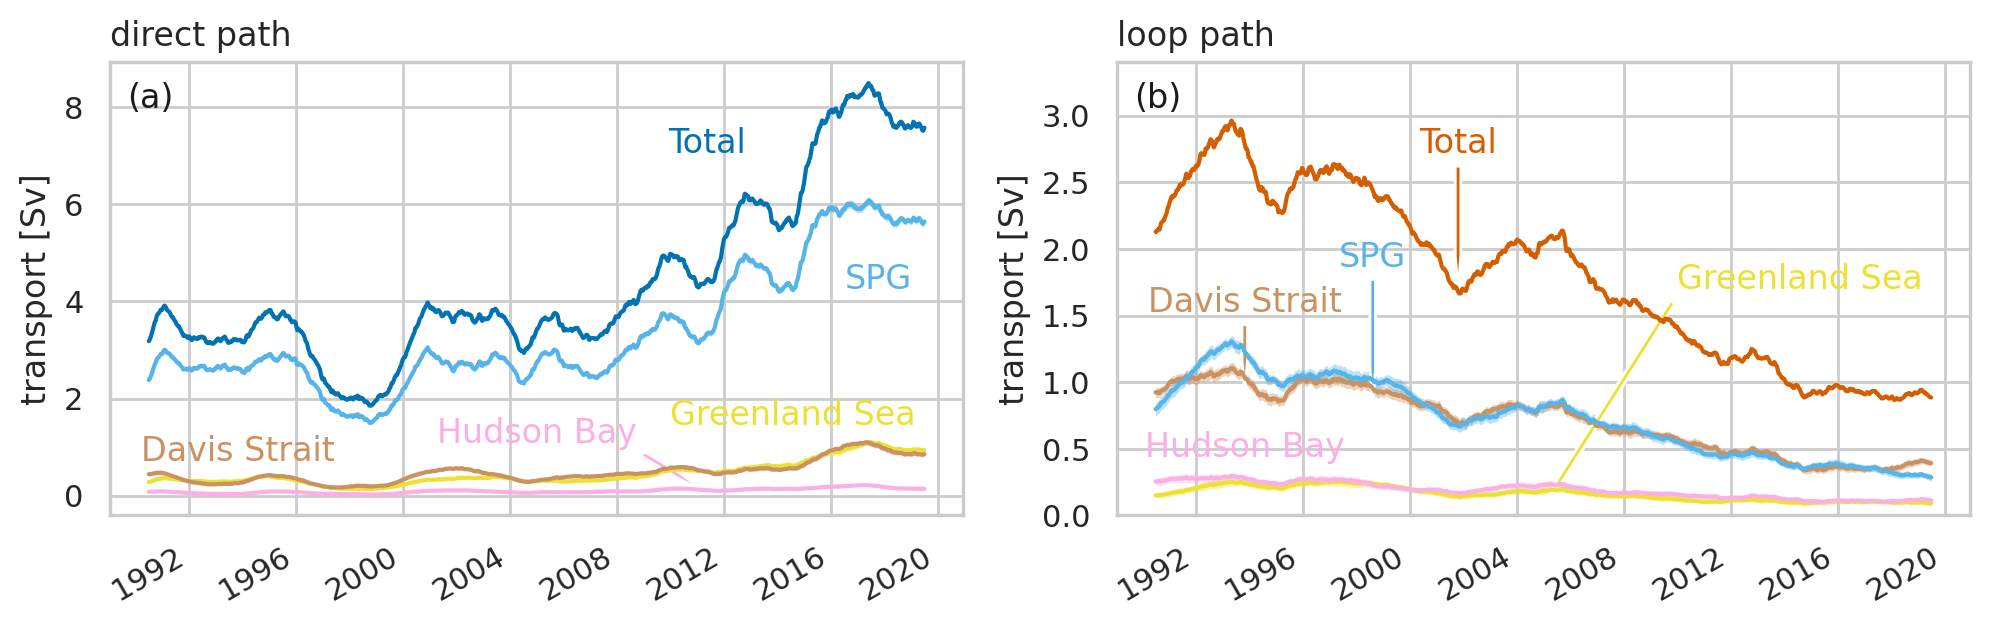

In [73]:
sns.set(style="whitegrid")
sns.set_palette("colorblind")
def plot_ts_with_errorbars(ds,roll,ax,colour,label='',dashes=[],zorder=10):

    rolling = (ds.mean(dim='subsetno').rolling(time=roll,center=True).mean())
    std = ((ds.rolling(time=roll,center=True).mean()).std(dim='subsetno'))
    rolling.plot(ax=ax,color=colour,label=label,dashes=dashes,zorder=zorder)
    ax.fill_between(ds.time.data,rolling+1.96*std,rolling-1.96*std,color=colour,zorder=1,alpha=0.4,linewidth=0)
    return


fig,ax = plt.subplots(1,2,figsize = (12,3), sharex=True,gridspec_kw={'hspace': 0.3,'wspace': 0.18},dpi=200)

vt = lcdir_sum_1.vol_trans_normal.sum(dim='subsetno')

plot_ts_with_errorbars(vt*lcdir_mean_1.LCdir_is_path,73,ax[0],'C0')
plot_ts_with_errorbars(vt*lcdir_mean_1.Green_is_source,73,ax[0],'C8')
plot_ts_with_errorbars(vt*lcdir_mean_1.Davis_is_source,73,ax[0],'C5')
plot_ts_with_errorbars(vt*lcdir_mean_1.Hudba_is_source,73,ax[0],'C6')
plot_ts_with_errorbars(vt*(1-lcdir_mean_1.Green_is_source-
     lcdir_mean_1.Davis_is_source-
     lcdir_mean_1.Hudba_is_source),73,ax[0],'C9')

ax[0].set_ylabel('transport [Sv]')
ax[0].set_xlabel('')
# ax[0].set_ylim(bottom=0,top=8)
ax[0].set_title('direct path',loc='left')
ax[0].text(0.02,0.9,'(a)',transform=ax[0].transAxes, color='k')

ax[0].annotate("Total", xy=(0.9,0.5),  xycoords='axes fraction',
            xytext=(0.7,0.8), textcoords='axes fraction', ha='center',color='C0',)
ax[0].annotate("SPG", xy=(0.9,0.5),  xycoords='axes fraction',
            xytext=(0.9,0.5), textcoords='axes fraction', ha='center',color='C9',)
ax[0].annotate("Greenland Sea", xy=(0.9,0.53),  xycoords='axes fraction',
            xytext=(0.8,0.2), textcoords='axes fraction', ha='center',color='C8',)
ax[0].annotate("Davis Strait", xy=(0.9,0.5),  xycoords='axes fraction',
            xytext=(0.15,0.12), textcoords='axes fraction', ha='center',color='C5',)
ax[0].annotate("Hudson Bay", xy=(0.7,0.05),  xycoords='axes fraction',arrowprops=dict(facecolor='C6',width = 2,headwidth=2,frac=0.01),
            xytext=(0.5,0.16), textcoords='axes fraction', ha='center',color='C6',)



vt = lc60w_sum_1.vol_trans_normal.sum(dim='subsetno')

plot_ts_with_errorbars(vt*lc60w_mean_1.LC60W_is_path,73,ax[1],'C3')
plot_ts_with_errorbars(vt*lc60w_mean_1.Green_is_source,73,ax[1],'C8')
plot_ts_with_errorbars(vt*lc60w_mean_1.Davis_is_source,73,ax[1],'C5')
plot_ts_with_errorbars(vt*lc60w_mean_1.Hudba_is_source,73,ax[1],'C6')
plot_ts_with_errorbars(vt*(1-lc60w_mean_1.Green_is_source-
     lc60w_mean_1.Davis_is_source-
     lc60w_mean_1.Hudba_is_source),73,ax[1],'C9')
ax[1].set_ylabel('transport [Sv]')
ax[1].set_xlabel('')
ax[1].set_ylim(bottom=0,top=3.4)
ax[1].set_title('loop path',loc='left')
ax[1].text(0.02,0.9,'(b)',transform=ax[1].transAxes, color='k')
ax[1].annotate("Total", xy=(0.4,0.5),  xycoords='axes fraction',arrowprops=dict(facecolor='C3',width = 2,headwidth=2,frac=0.01),
            xytext=(0.4,0.8), textcoords='axes fraction', ha='center',color='C3')
ax[1].annotate("SPG", xy=(0.3,0.25),  xycoords='axes fraction',arrowprops=dict(facecolor='C9',width = 2,headwidth=2,frac=0.01),
            xytext=(0.3,0.55), textcoords='axes fraction', ha='center',color='C9')
ax[1].annotate("Greenland Sea", xy=(0.5,0.02),  xycoords='axes fraction',arrowprops=dict(facecolor='C8',width = 2,headwidth=2,frac=0.01),
            xytext=(0.8,0.5), textcoords='axes fraction', ha='center',color='C8')
ax[1].annotate("Davis Strait", xy=(0.15,0.27),  xycoords='axes fraction',arrowprops=dict(facecolor='C5',width = 2,headwidth=2,frac=0.01),
            xytext=(0.15,0.45), textcoords='axes fraction', ha='center',color='C5')
ax[1].annotate("Hudson Bay", xy=(0.9,0.5),  xycoords='axes fraction',
            xytext=(0.15,0.13), textcoords='axes fraction', ha='center',color='C6')


fignamepng = 'f10.png'
fignamepdf = 'f10.pdf'
plt.savefig(project_path / figure_path / fignamepng,dpi=300, bbox_inches='tight')
plt.savefig(project_path / figure_path / fignamepng,dpi=300, bbox_inches='tight')

